<a href="https://colab.research.google.com/github/afiflh/Machine_Learning/blob/main/Kuis%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KUIS 1: Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

Nama: Afif Lukmanul Hakim

Kelas: TI-3G/02

NIM: 2141720262

In [1]:
# Menginstal beberapa paket Python yang umum digunakan.
%pip install torch torchvision numpy matplotlib pandas

In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Download MNIST dataset menggunakan torchvision
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 43913814.47it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 58350526.89it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 19607090.52it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15095506.16it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Ekstrak data dan label
data_mnist = mnist_dataset.data
label = mnist_dataset.targets

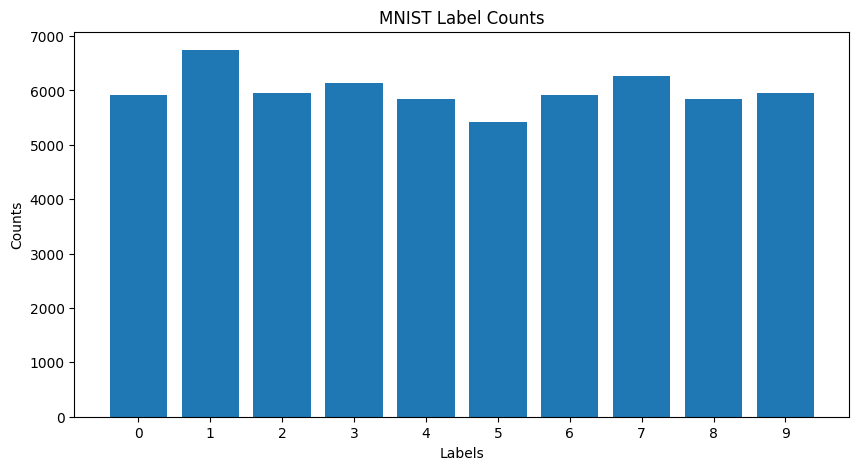

In [4]:
#1 Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan?
labelcounts = torch.bincount(label)

#Tampilkan data
plt.figure(figsize=(10, 5))
plt.bar(range(10), labelcounts)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('MNIST Label Counts')
plt.show()

**Penjelasan Menurut Kelompok**

Dapat dilihat dari histogram diatas bahwa tidak terdapat imbalance data pada dataset MNIST karena jumlah sampel untuk setiap digit meskipun ada yang tidak sama, tetapi perbedaannya tidak signifikan.

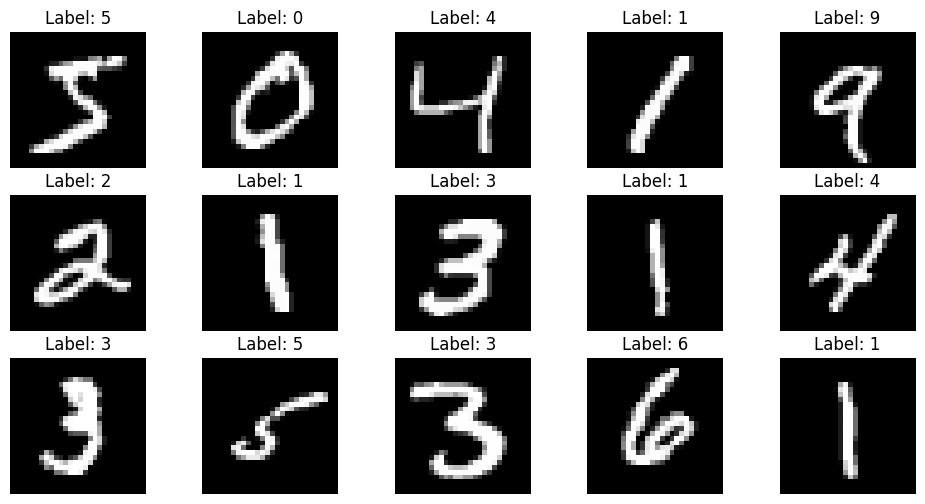

In [5]:
#2 Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya.
plt.figure(figsize=(12, 6))

for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(data_mnist[i], cmap='gray')
    plt.title(f"Label: {label[i].item()}")
    plt.axis('off')

plt.show()

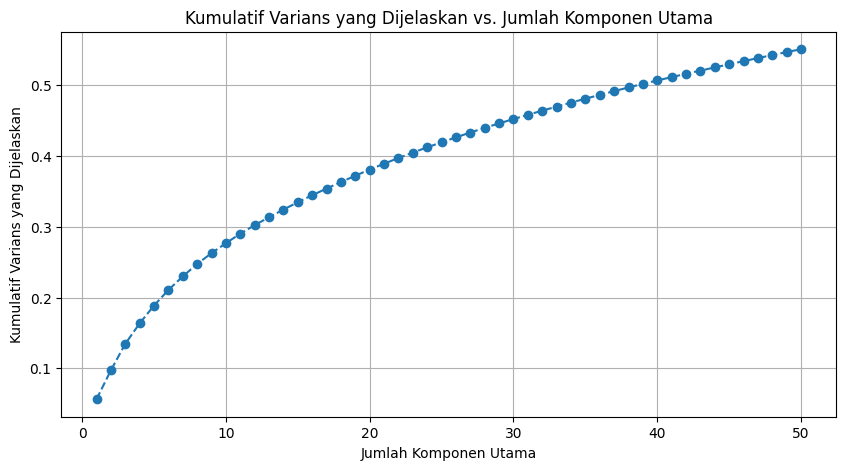

In [6]:
#3 Lakukan proses ekstraksi fitur pada data MNIST

#Menganalisis dan preprocessing data.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Mengubah bentuk (reshape) array data.
data = data_mnist.reshape(data_mnist.shape[0], -1)

#Standarisasi data (rata-rata=0, varians=1)
scaler_data = StandardScaler()
datastd = scaler_data.fit_transform(data)

#Melakukan PCA dengan jumlah komponen yang diinginkan
n_components = 50
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(datastd)

#Menampilkan rasio varians yang dijelaskan
variance_ratios = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratios)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1),
         cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Kumulatif Varians yang Dijelaskan')
plt.title('Kumulatif Varians yang Dijelaskan vs. Jumlah Komponen Utama')
plt.grid()
plt.show()

In [7]:
#4  Buat data training dan data testing menggunakan rasio 70:30, 80:20, 90:10

from sklearn.model_selection import train_test_split

# Daftar Ukuran Data Uji
test_sizes = [0.3, 0.2, 0.1]

# Inisialisasi daftar kosong untuk menyimpan pembagian data
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

# Pembagian data latih-uji untuk setiap ukuran data uji
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(pca_data, label, test_size=test_size)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# Verifikasi bentuk (shapes) dari himpunan data latih dan uji untuk setiap pembagian (split)
for i, test_size in enumerate(test_sizes):
    print(f"Split {i + 1}:")
    print(f"X_train shape: {X_train_list[i].shape}")
    print(f"y_train shape: {y_train_list[i].shape}")
    print(f"X_test shape: {X_test_list[i].shape}")
    print(f"y_test shape: {y_test_list[i].shape}")
    print()

Split 1:
X_train shape: (42000, 50)
y_train shape: torch.Size([42000])
X_test shape: (18000, 50)
y_test shape: torch.Size([18000])

Split 2:
X_train shape: (48000, 50)
y_train shape: torch.Size([48000])
X_test shape: (12000, 50)
y_test shape: torch.Size([12000])

Split 3:
X_train shape: (54000, 50)
y_train shape: torch.Size([54000])
X_test shape: (6000, 50)
y_test shape: torch.Size([6000])



In [8]:
#5, 6, 7 Klasifikasi menggunakan RBF Kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rbf_kernel = SVC(kernel='rbf')

# Melatih model SVM pada data uji
rbf_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred = rbf_kernel.predict(X_test)

# Evaluasi model
akurasi = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matrix Konfusi:\n', confusion_mtx)

Akurasi: 96.95%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       601
           1       0.98      0.99      0.98       671
           2       0.96      0.96      0.96       606
           3       0.96      0.95      0.96       631
           4       0.96      0.96      0.96       568
           5       0.97      0.97      0.97       528
           6       0.98      0.99      0.98       585
           7       0.97      0.97      0.97       637
           8       0.97      0.95      0.96       594
           9       0.96      0.96      0.96       579

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

Matrix Konfusi:
 [[597   0   0   0   1   1   1   0   1   0]
 [  0 661   5   2   1   0   0   0   1   1]
 [  4   2 583   5   2   0   2   5   2   1]
 [  2   0   4 601   1   8   1   3   7   4]
 [  0   0   4 

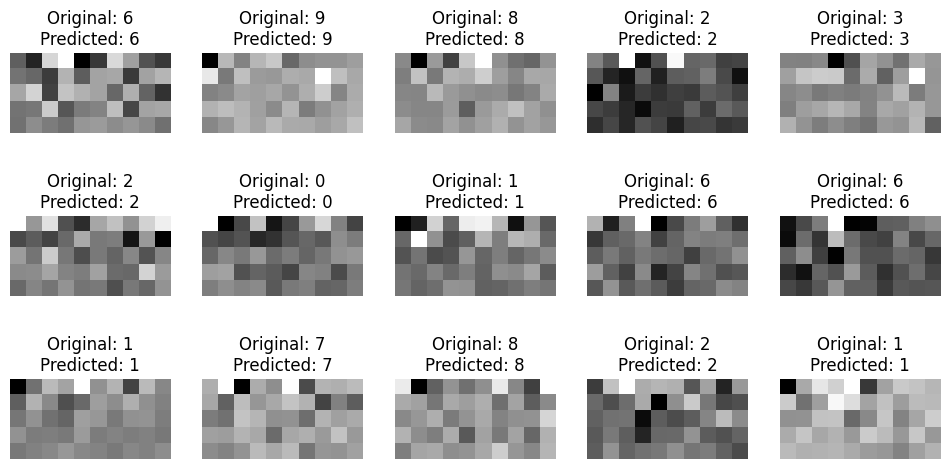

In [9]:
# Menampilkan citra data testing berserta hasil pelabelannya

plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [10]:
#5, 6, 7 Klasifikasi menggunakan Polynomial Kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

polynomial_kernel = SVC(kernel='poly', degree=3)

# Melatih model SVM pada data uji
polynomial_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_predict = polynomial_kernel.predict(X_test)

#Evaluasi Model
akurasi = accuracy_score(y_test, y_predict)
classification_rep = classification_report(y_test, y_predict)
confusion_mtx = confusion_matrix(y_test, y_predict)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

Akurasi: 96.63%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       601
           1       0.98      0.98      0.98       671
           2       0.97      0.97      0.97       606
           3       0.97      0.94      0.96       631
           4       0.96      0.97      0.96       568
           5       0.96      0.98      0.97       528
           6       0.99      0.99      0.99       585
           7       0.97      0.95      0.96       637
           8       0.93      0.95      0.94       594
           9       0.96      0.95      0.96       579

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

Matriks Konfusi:
 [[590   0   2   0   1   1   1   0   5   1]
 [  0 658   5   2   1   1   0   0   3   1]
 [  2   0 585   2   1   0   1   3  11   1]
 [  1   0   3 595   1  11   0   4  13   3]
 [  1   1   3

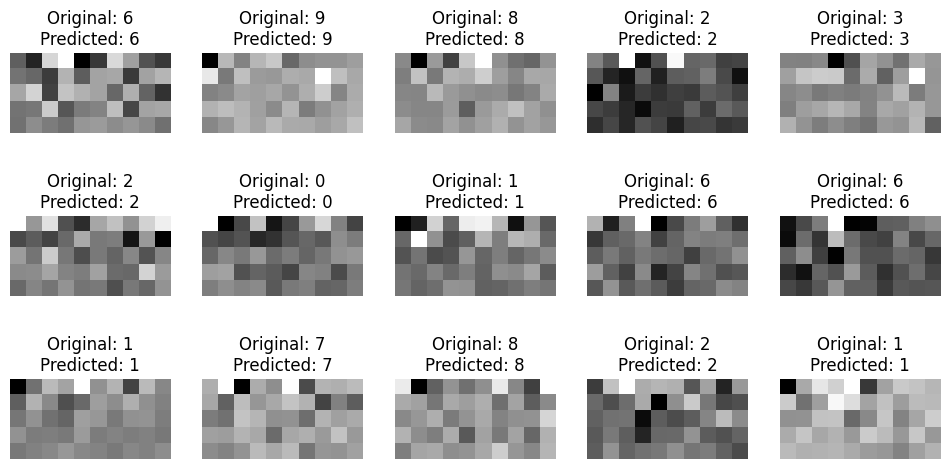

In [11]:
# Menampilkan citra data testing berserta hasil pelabelannya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [14]:
#5, 6, 7 Klasifikasi menggunakan Linear Kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

linear_kernel = SVC(kernel='linear')

# Melatih model SVM pada data uji
linear_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_predict = linear_kernel.predict(X_test)

#Evaluasi Model
akurasi = accuracy_score(y_test, y_predict)
classification_rep = classification_report(y_test, y_predict)
confusion_mtx = confusion_matrix(y_test, y_predict)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

Akurasi: 93.02%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       601
           1       0.96      0.98      0.97       671
           2       0.92      0.92      0.92       606
           3       0.89      0.88      0.89       631
           4       0.92      0.94      0.93       568
           5       0.88      0.89      0.88       528
           6       0.95      0.97      0.96       585
           7       0.96      0.94      0.95       637
           8       0.92      0.85      0.88       594
           9       0.92      0.93      0.93       579

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000

Matriks Konfusi:
 [[589   0   1   1   1   6   1   0   2   0]
 [  0 660   4   0   1   1   1   0   2   2]
 [  9   4 555   8   7   1   8   2  11   1]
 [  2   0  15 557   2  25   3   5  18   4]
 [  1   0   4

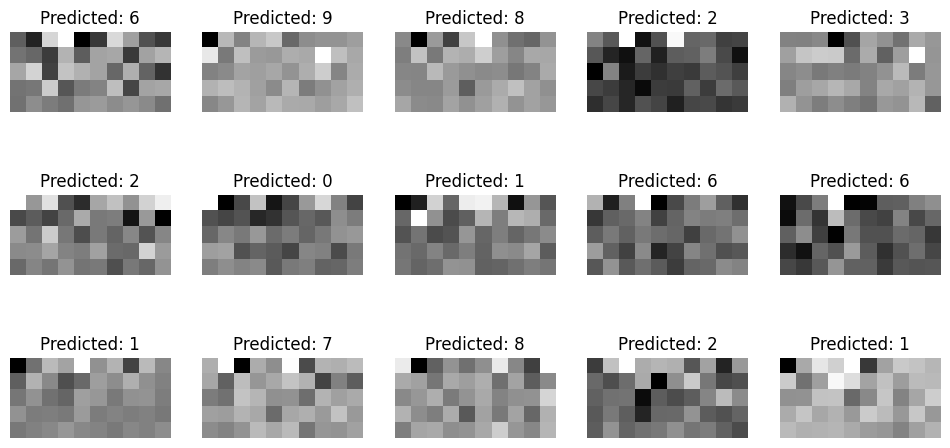

In [15]:
# Menampilkan citra dari data testing
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Predicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [16]:
# 5, 6, 7 Klasifikasi menggunakan Naive Bayes Kernel

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model Naive Bayes dengan kernel Gaussian
naive_bayes_model = GaussianNB()

# Melatih model pada data pelatihan
naive_bayes_model.fit(X_train, y_train)

# Memprediksi label pada data uji
y_predict = naive_bayes_model.predict(X_test)

# Evaluasi Model
akurasi = accuracy_score(y_test, y_predict)
classification_rep = classification_report(y_test, y_predict)
confusion_mtx = confusion_matrix(y_test, y_predict)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

Akurasi: 72.17%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       601
           1       0.84      0.94      0.88       671
           2       0.67      0.61      0.64       606
           3       0.85      0.50      0.63       631
           4       0.72      0.82      0.76       568
           5       0.72      0.66      0.69       528
           6       0.95      0.74      0.83       585
           7       0.88      0.46      0.60       637
           8       0.49      0.76      0.59       594
           9       0.59      0.78      0.67       579

    accuracy                           0.72      6000
   macro avg       0.75      0.72      0.72      6000
weighted avg       0.75      0.72      0.72      6000

Matriks Konfusi:
 [[574   0  10   1   2   5   3   0   5   1]
 [  0 630   2   1   3   4   4   2  24   1]
 [ 29  11 370  16  38  13   9   5 110   5]
 [ 20  19  29 315   2  45   1   9 183   8]
 [  4   8  33

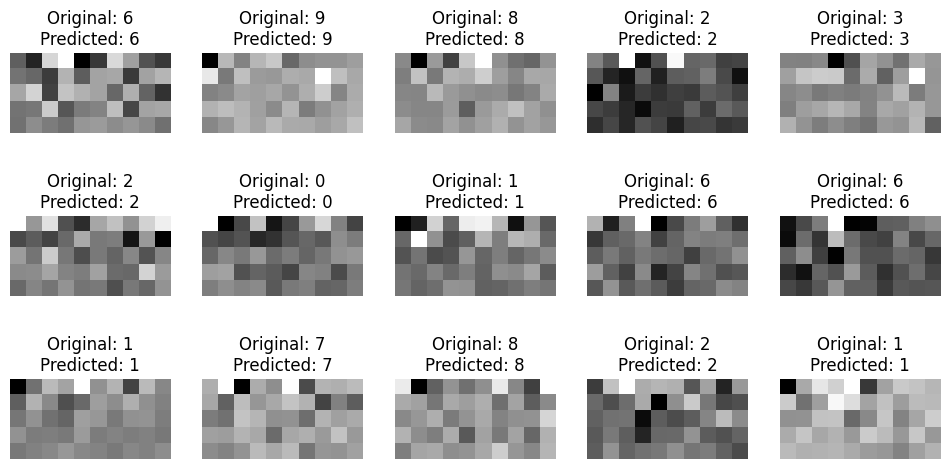

In [17]:
# Menampilkan citra data testing beserta label prediksi
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

- aku